# ARIMA

ARIMA adalah metode statistikal yang cukup populer digunakan untuk time series forecasting dan data analysis. ARIMA adalah singkatan dari AutoRegressive Integrated Moving Average. Metode ini menangkap struktur dari sebuah time series data untuk mengetahui pola dari data tersebut.



ARIMA mempunyai 2 jenis, yaitu:
1. Non-seasonal ARIMA
2. Seasonal ARIMA

ARIMA model biasanya digunakan dalam kasus dimana data terplot secara non-stationary, dimana akan diberlakukan langkah differencing pada data yang diobservasi sehingga data terplot menjadi stationary.

Non-seasonal ARIMA secara umum mempunyai 3 parameter, yaitu p, d, dan q. parameter-parameter ini bernilai non-negative.
1. AR(p):AutoRegression. Regresi yang memanfaatkan fitur-fitur antara parameter yang diamati terhadap parameter sebelumnya.
2. I(d):Integrated. Dilakukan Operasi selisih antara data point yang diamati terhadap data point pada waktu sebelumnya (t-1). Hal ini dilakukan untuk membuat time series menjadi stationary.
3. MA(q):Moving Average. Nilai yang mempunyai ketergantungan terhadap parameter yang diamati dan error pada model Moving Average.

Untuk memaksimalkan model ARIMA, kita harus membuat data terplot secara stationary. Data time-series stationary adalah data yang mempunyai nilai rata-rata dan varian yang konstan terhadap waktu. Stationary data dibutuhkan agar model bisa membuat prediksi dengan baik.






Berikut adalah contoh data stationary dan non-stationary.

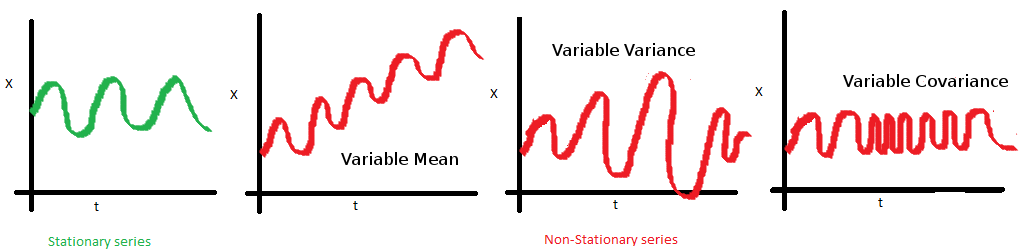

Jika data yang kita peroleh bersifat non-stationary, maka kita harus mengubah data tersebut menjadi stationary agar kita bisa mengevaluasi dan menentukan parameter-parameter pada ARIMA. Caranya adalah melakukan differencing.

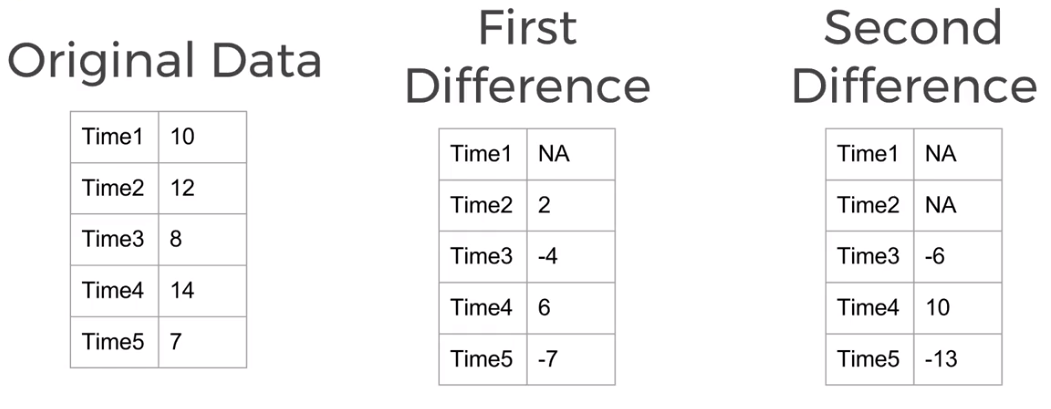

Cara kerjanya relatif mudah dimengerti. jadi saat data bersifat non-stationary saat kita amati, maka kita bisa melakukan differencing tahap pertama. Jika saat differencing pertama telah dilakukan namun data masih bersifat non-stationary saat kita amati, maka kita bisa melakukan differencing tahap kedua. Differencing bisa terus dilakukan sampai data yang kita peroleh bersifat stationary. Yang harus kita perhatikan diatas adalah setiap melakukan differencing, maka kita akan mengorbankan 1 baris data.

Kita bisa melakukan differencing berdasarkan season/musim. Contoh, jika kita mempunyai data bulanan, kita bisa melakukan differencing dengan nilai 12, jika kita ingin mendefinisikan 1 musim = 1 tahun.

Saat data kita menjadi stationary, maka kita mampu melanjutkan ke tahap selanjutnya, yaitu menentukan p, d, dan q. Sebelum menentukan nilai p, d, dan q, kita harus mengetahui AutoCorrelation Plots 

AutoCorrelation plot menunjukan korelasi antara time series data terhadap data sebelumnya yang dimundurkan(lagged) sebesar x. Jadi y axis adalah nilai korelasi, x adalah jumlah unit waktu yang dimundurkan.

Contoh jika kita mempunyai time series sebesar T, kita copy  menjadi 2. Kita hapus data pertama dari copy pertama, kemudian kita hapus data terakhir dari copy kedua. Dengan ini kita mempunyai data untuk membuat AutoCorrelation plot dengan lag unit sebesar 1.

Gradual Decline
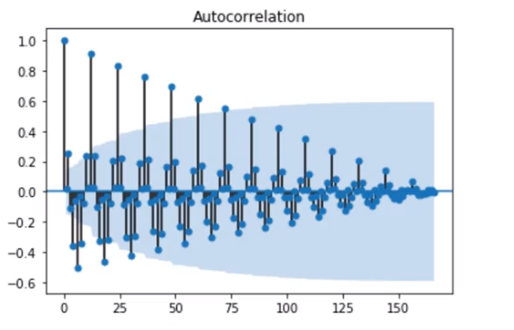

Sharp Drop-off
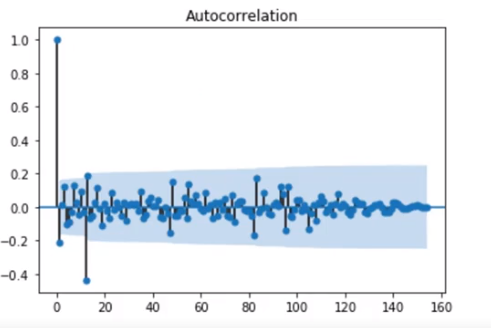

Bagaimana cara kita menentukan model mana yang harus kita pilih? apakah AR atau MA? Berapa nilai lag yang harus kita pilih? 

Saat AutoCorrelation Plot bernilai positif saat lag pertama(x=1), maka kita disarankan untuk menggunakan AR model. Sebaliknya, Saat AutoCorrelation Plot bernilai negatif saat lag pertama, maka kita disarankan untuk menggunakan MA model. Cara ini cukup baik untuk menentukan nilai p, d, dan q pada model ARIMA.<br>
p: jumlah lag<br>
d: jumlah tahap differencing<br>
q: Nilai ukuran terhadap Moving Average.

Untuk Seasonal ARIMA, akan ada parameter tambahan yang akan kita gunakan.

# CODING SECTION

Proses ARIMA pada umumnya seperti berikut.
1. Melakukan visualisasi time series data
2. membuat data time series menjadi stationary.
3. Plot AutoCorrelation 
4. Menentukan parameter model ARIMA.
5. menggunakan model untuk membuat prediksi.


In [84]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [85]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [86]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [87]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [88]:
df.columns = ['Month','Milk in pounds per cow']
df.head()

,Month,Milk in pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [89]:

df.drop(168,axis=0,inplace=True)

In [90]:
df['Month'] = pd.to_datetime(df['Month'])

In [91]:
df.head()

,Month,Milk in pounds per cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [92]:
df.set_index('Month',inplace=True)

In [93]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [94]:
df.describe()

,Milk in pounds per cow
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


# Visualisasi

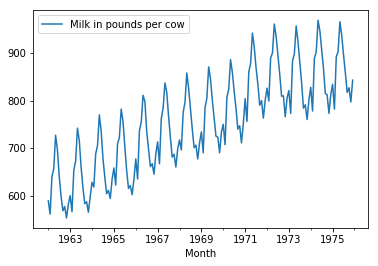

In [95]:
df.plot()

In [96]:
timeseries = df['Milk in pounds per cow']

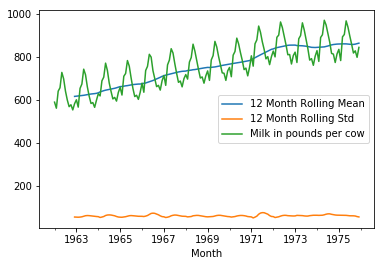

In [97]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

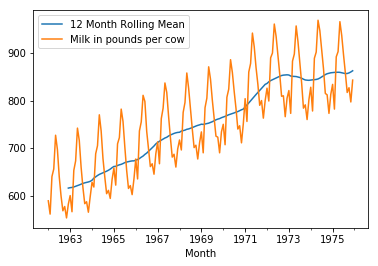

In [98]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.plot()
plt.legend()

## Decomposition

<Figure size 432x288 with 0 Axes>

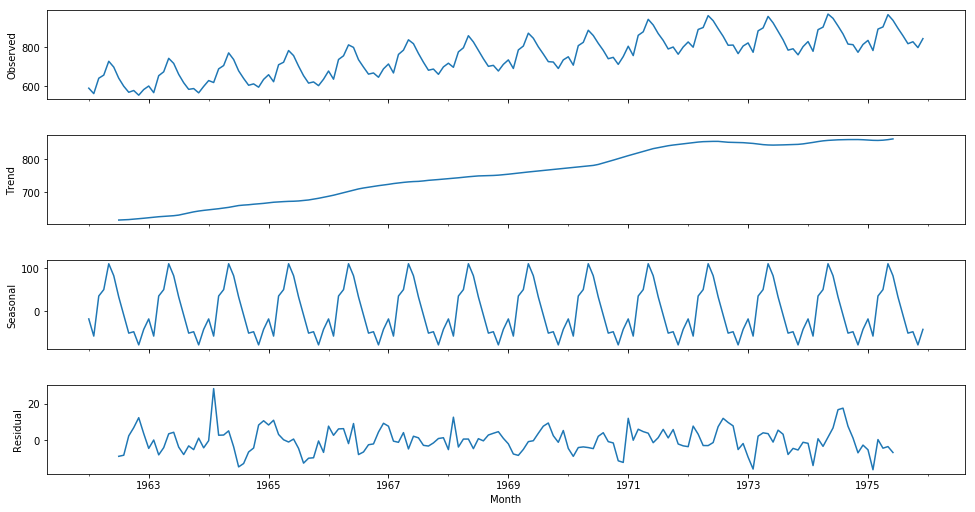

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Milk in pounds per cow'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

# Stationary Test


In [100]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [101]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Milk in pounds per cow'])

In [102]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3038115874221246
p-value : 0.627426708603034
#Lags Used : 13
Number of Observations Used : 154
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [103]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

## Differencing

In [104]:
df['Milk First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

In [105]:
adf_check(df['Milk First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530553
p-value : 0.03006800400178688
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


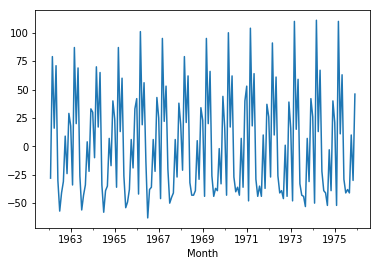

In [106]:
df['Milk First Difference'].plot()

** Second Difference **

In [107]:
# Sometimes it would be necessary to do a second difference 
# This is just for show, we didn't need to do a second difference in our case
df['Milk Second Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(1)

In [108]:
adf_check(df['Milk Second Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.327873645603336
p-value : 1.1126989332083069e-26
#Lags Used : 11
Number of Observations Used : 154
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


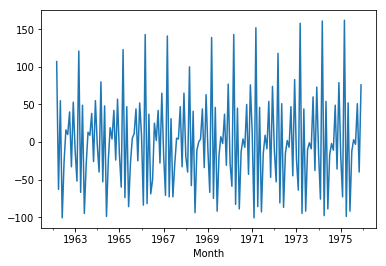

In [109]:
df['Milk Second Difference'].plot()

** Seasonal Difference **

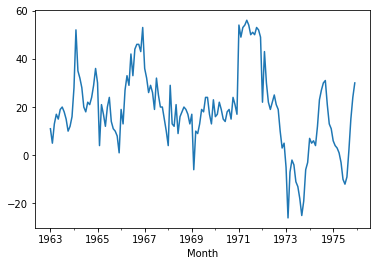

In [110]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)
df['Seasonal Difference'].plot()

In [111]:
# Seasonal Difference by itself was not enough!
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.3354193143593993
p-value : 0.16079880527711304
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


** Seasonal First Difference **

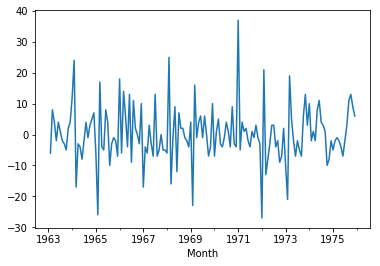

In [112]:
# You can also do seasonal first difference
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)
df['Seasonal First Difference'].plot()

In [113]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.038002274921985
p-value : 1.86542343187882e-05
#Lags Used : 11
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [114]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

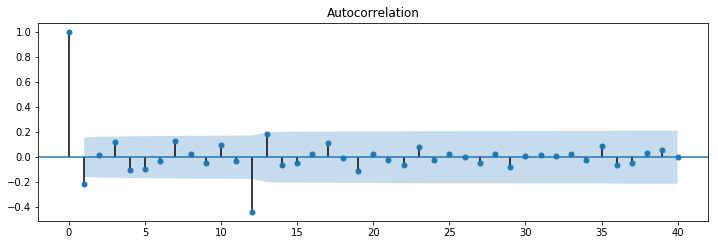

In [115]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)


# Modelling with ARIMA

In [116]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [117]:
# I recommend you glance over this!

# 
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes


p: jumlah lag<br>
d: jumlah tahap differencing<br>
q: Nilai ukuran terhadap Moving Average.


In [140]:
# We have seasonal data!
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()


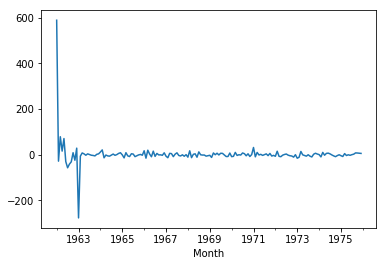

In [141]:
results.resid.plot()

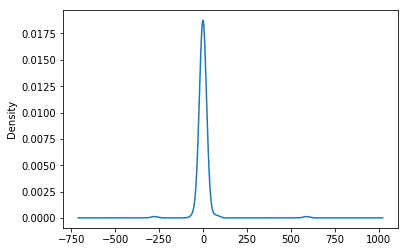

In [142]:
results.resid.plot(kind='kde')

## Prediction of Future Values



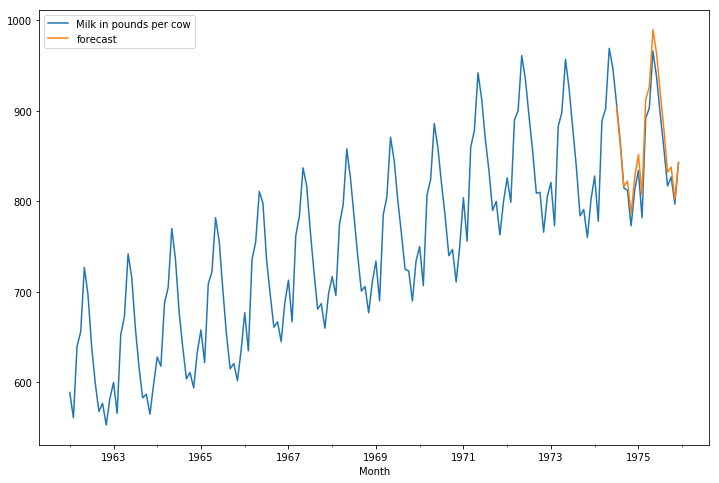

In [143]:
df['forecast'] = results.predict(start = 150, end= 168, dynamic= True)  
df[['Milk in pounds per cow','forecast']].plot(figsize=(12,8))

### Forecasting
This requires more time periods, so let's create them with pandas onto our original dataframe!

In [144]:
df.tail()

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,879.668975
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,832.328554
1975-10-01,827.0,10.0,51.0,15.0,13.0,837.722250
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,802.452737
1975-12-01,843.0,46.0,76.0,30.0,6.0,842.499871


In [145]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24) ]
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [146]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [147]:
future_df = pd.concat([df,future_dates_df])

In [148]:
future_df.head()


,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN


In [149]:
future_df.tail()

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


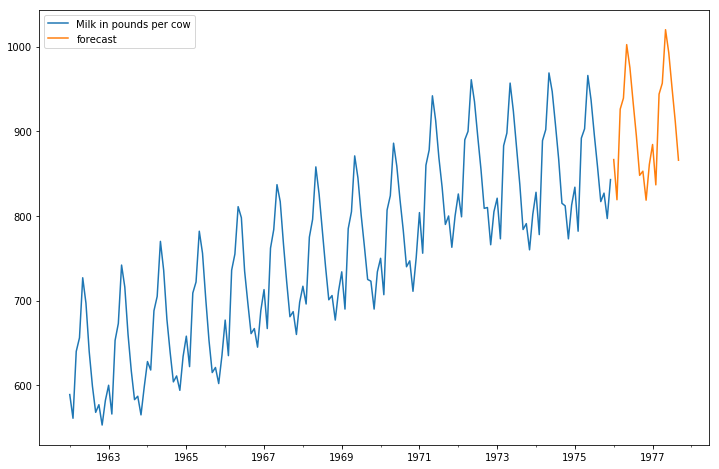

In [150]:
future_df['forecast'] = results.predict(start = 168, end = 188, dynamic= True)  
future_df[['Milk in pounds per cow', 'forecast']].plot(figsize=(12, 8)) 

# KESIMPULAN

ARIMA sangat cocok untuk digunakan pada dataset diatas. Namun, banyak dataset yang sifatnya tidak bisa dikenali oleh ARIMA sehingga harus dimodelkan dengan metode yang lain, contohnya dataset yang bersifat finansial.